<a href="https://colab.research.google.com/github/Inryu/capstone-design-exception/blob/main/deep-learning/6_2_%EA%B0%80%EC%A4%91%EC%B9%98%EC%9D%98_%EC%B4%88%EA%B9%83%EA%B0%92.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## __6.2 가중치의 초깃값__

### __6.2.2 은닉층의 활성화값 분포__

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/deep-learning-from-scratch-master/

/content/drive/MyDrive/deep-learning-from-scratch-master


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

x = np.random.randn(1000, 100) # 1000개의 데이터
node_num = 100 # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5 # 은닉층이 5개
activations = {} # 이곳에 활성화 결과(활성화값)를 저장

for i in range(hidden_layer_size):
  if i != 0:
    x = activations[i-1]

  #w = np.random.randn(node_num, node_num) * 1
  #w = np.random.randn(node_num, node_num) * 0.01
  w = np.random.randn(node_num, node_num) / np.sqrt(node_num)
  a = np.dot(x, w)
  z = sigmoid(a)
  activations[i] = z

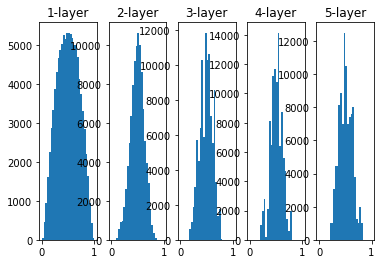

In [ ]:
# 히스토그램 그리기
for i, a in activations.items():
  plt.subplot(1, len(activations), i+1)
  plt.title(str(i+1) + "-layer")
  plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

### __6.2.4 MNIST 데이터셋으로 본 가중치 초깃값 비교__

===========iteration:0===========
std=0.01:2.3025152514987446
Xavier:2.3062225709675914
He:2.3120771685106494
===========iteration:100===========
std=0.01:2.3027196488580914
Xavier:2.2540129597545606
He:1.8094663591381177
===========iteration:200===========
std=0.01:2.301402353573274
Xavier:2.198892166585833
He:1.0114799094463542
===========iteration:300===========
std=0.01:2.301155173779473
Xavier:1.9403003081055863
He:0.6493765723361153
===========iteration:400===========
std=0.01:2.300803321069001
Xavier:1.51349821108509
He:0.4921635214020019
===========iteration:500===========
std=0.01:2.304163654651376
Xavier:0.988001518277255
He:0.4578619413800433
===========iteration:600===========
std=0.01:2.2974942902977826
Xavier:0.6967076963228547
He:0.3851018061536787
===========iteration:700===========
std=0.01:2.3026195686470894
Xavier:0.5280906019680335
He:0.3062529719893094
===========iteration:800===========
std=0.01:2.2999634379172793
Xavier:0.6794783434979423
He:0.4446122793247432
==

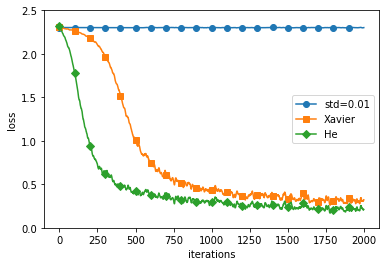

In [ ]:
import os
import sys

sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD


# 0. MNIST 데이터 읽기==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1. 실험용 설정==========
weight_init_types = {'std=0.01': 0.01, 'Xavier': 'sigmoid', 'He': 'relu'}
optimizer = SGD(lr=0.01)

networks = {}
train_loss = {}
for key, weight_type in weight_init_types.items():
    networks[key] = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100],
                                  output_size=10, weight_init_std=weight_type)
    train_loss[key] = []


# 2. 훈련 시작==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in weight_init_types.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizer.update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print("===========" + "iteration:" + str(i) + "===========")
        for key in weight_init_types.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3. 그래프 그리기==========
markers = {'std=0.01': 'o', 'Xavier': 's', 'He': 'D'}
x = np.arange(max_iterations)
for key in weight_init_types.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 2.5)
plt.legend()
plt.show()